# CROP PREDICTION


### DATA SET ANALYSIS

DataSet Link: https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("CY.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


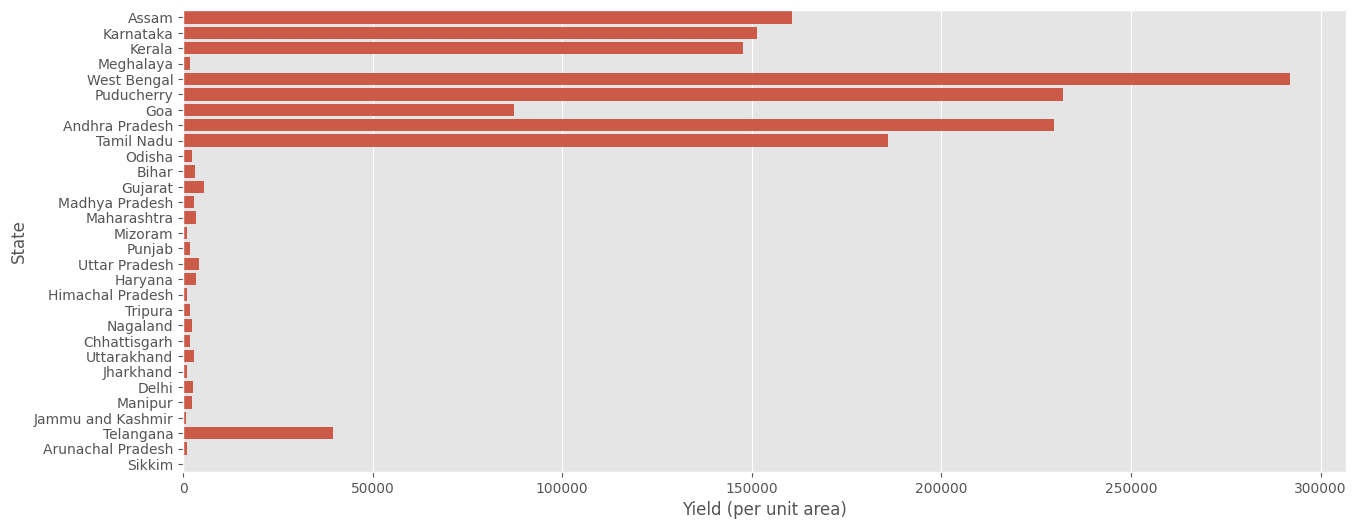

In [4]:
States = df['State'].unique()
YieldperState = {}
for State in States:
    YieldperState[State] = df[df['State']==State]['Yield'].sum()

plt.figure(figsize=(15,6))
sns.barplot(y = YieldperState.keys(), x = YieldperState.values())
plt.xlabel("Yield (per unit area)")
plt.ylabel("State")
plt.show()

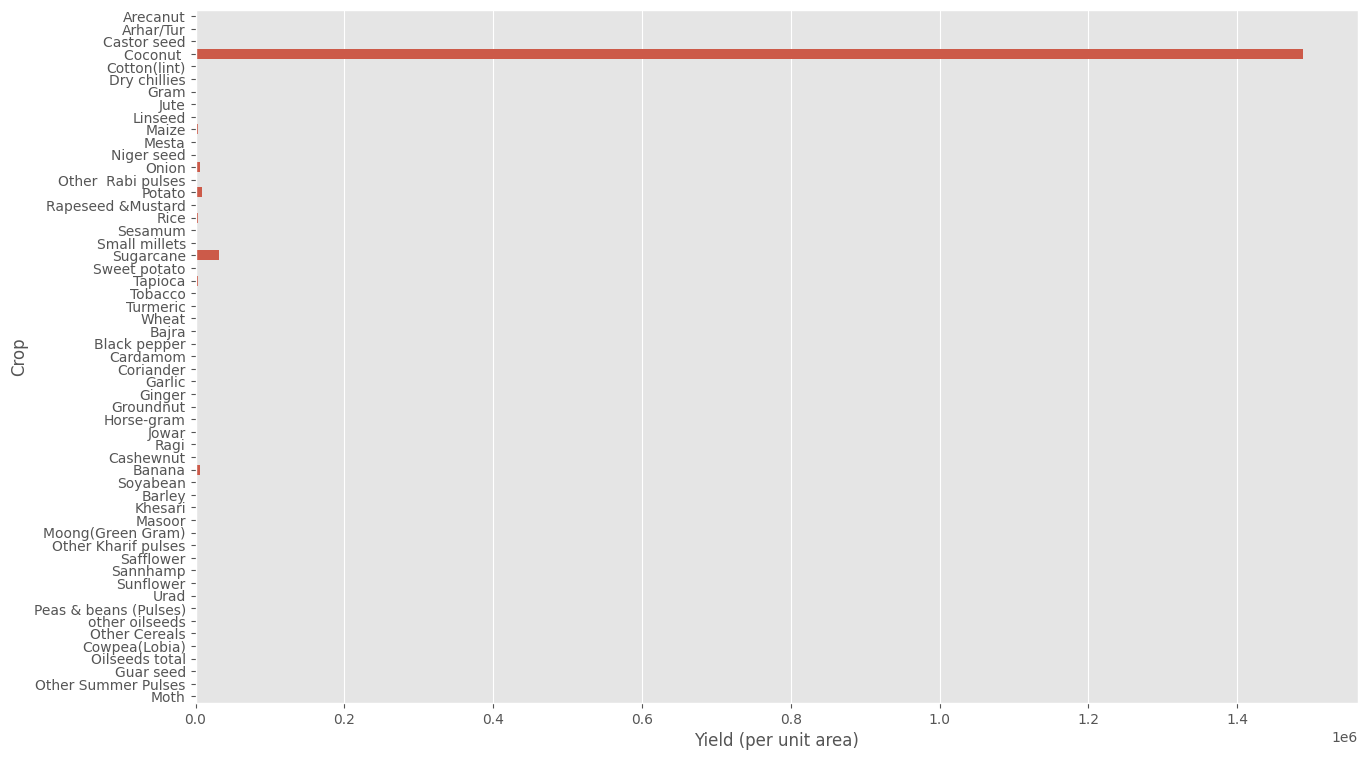

In [6]:
Crops = df['Crop'].unique()
YieldperCrop = {}
for Crop in Crops:
    YieldperCrop[Crop] = df[df['Crop']==Crop]['Yield'].sum()

plt.figure(figsize=(15,9))
sns.barplot(y = YieldperCrop.keys(), x = YieldperCrop.values())
plt.xlabel("Yield (per unit area)")
plt.ylabel("Crop")
plt.show()

### DATASET SPLIT & PREPROCESSING FOR TRAINING MODEL

In [7]:
col = [ 'Crop_Year', 'Area', 'Production','Annual_Rainfall', 'Fertilizer', 'Pesticide','Crop','Season','State', 'Yield']
df = df[col]
df.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Crop,Season,State,Yield
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,Arecanut,Whole Year,Assam,0.796087
1,1997,6637.0,4685,2051.4,631643.29,2057.47,Arhar/Tur,Kharif,Assam,0.710435
2,1997,796.0,22,2051.4,75755.32,246.76,Castor seed,Kharif,Assam,0.238333
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,Coconut,Whole Year,Assam,5238.051739
4,1997,1739.0,794,2051.4,165500.63,539.09,Cotton(lint),Kharif,Assam,0.420909


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Yield', axis=1)
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle = True)

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
scale = StandardScaler()

prepro = ColumnTransformer(
    transformers = [
        ("StandardScale", scale, [0,1,2,3,4,5]),
        ("HotEncoder", ohe, [6,7,8])
    ], remainder = 'passthrough'
)

X_train_dummy = prepro.fit_transform(X_train)
X_test_dummy = prepro.transform(X_test)

### ML MODEL ANALYSIS

COMPARING FOLLOWING ML MODELS:
LINEAR REGRESSION
LASSO
RIDGE
DECISION TREE
KNEIGHBOURS REGRESSOR

 LinearRegression : MAE = 58.18878260471119 & R2 = 0.8467624837681733
 Lasso : MAE = 47.03483879840308 & R2 = 0.8431113804043715
 Ridge : MAE = 58.57576309348007 & R2 = 0.8450143117504194
 DecisionTree : MAE = 8.157707802928897 & R2 = 0.9674473711638295
 KNeighbours : MAE = 9.905425409595582 & R2 = 0.9347108354628034


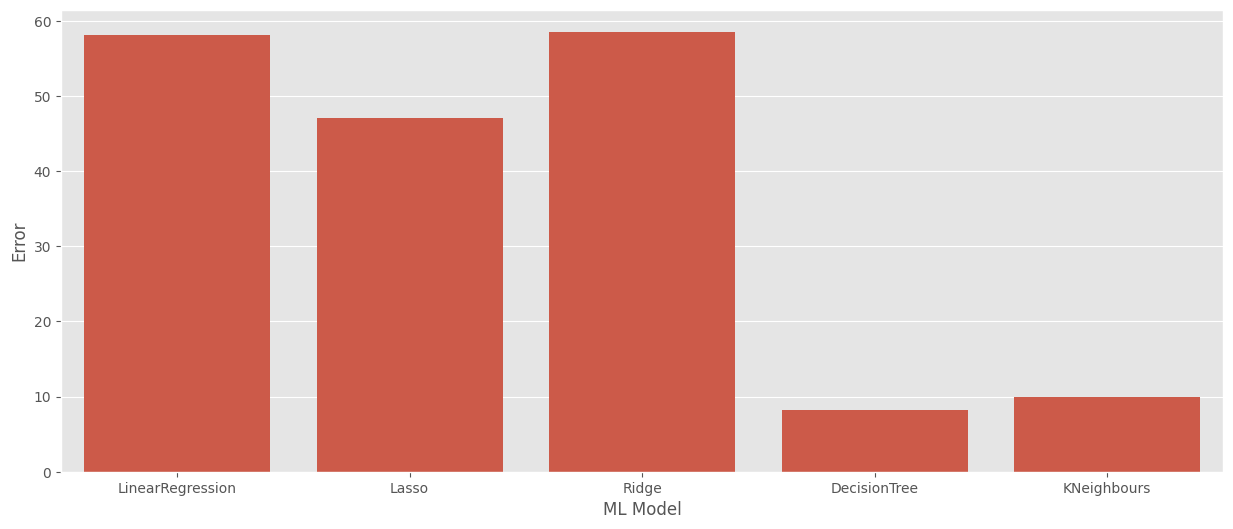

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbours": KNeighborsRegressor()
}

analysis = {}

for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    print(f" {name} : MAE = {mean_absolute_error(y_test, y_pred)} & R2 = {r2_score(y_test, y_pred)}")
    analysis[name] = mean_absolute_error(y_test, y_pred)


plt.figure(figsize=(15,6))
sns.barplot(y = analysis.values(), x = analysis.keys())
plt.xlabel("ML Model")
plt.ylabel("Error")
plt.show()

ANALYSIS MOST SUITABLE MODEL

In [11]:
model = models[min(analysis)]
def prediction(Crop_Year,Area, Production, Annual_Rainfall, Fertilizer, Pesticide,Crop,Season,State):
    features = np.array([[Crop_Year,Area, Production, Annual_Rainfall, Fertilizer, Pesticide,Crop,Season,State]], dtype = object)
    transform_features = prepro.transform(features)
    predicted_yeild = model.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]


In [12]:
df.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Crop,Season,State,Yield
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,Arecanut,Whole Year,Assam,0.796087
1,1997,6637.0,4685,2051.4,631643.29,2057.47,Arhar/Tur,Kharif,Assam,0.710435
2,1997,796.0,22,2051.4,75755.32,246.76,Castor seed,Kharif,Assam,0.238333
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,Coconut,Whole Year,Assam,5238.051739
4,1997,1739.0,794,2051.4,165500.63,539.09,Cotton(lint),Kharif,Assam,0.420909


ACTUAL VS PREDICTED YIELD CHECK FOR FIRST 50 ROWS OF DATASET

In [13]:
df = pd.read_csv('CY.csv', nrows=50)
df = df[col]
data_as_list = df.iloc[:, :10].values.tolist()
x = []
yieldpr = []
yieldsfr = []
xvalue = 0
for row in data_as_list:
    yieldpr.append(prediction(row[0], row[1], row[2], row[3], row[4], row[5],row[6],row[7],row[8]))
    yieldsfr.append(row[9])
    x.append(xvalue)
    xvalue += 1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have vali

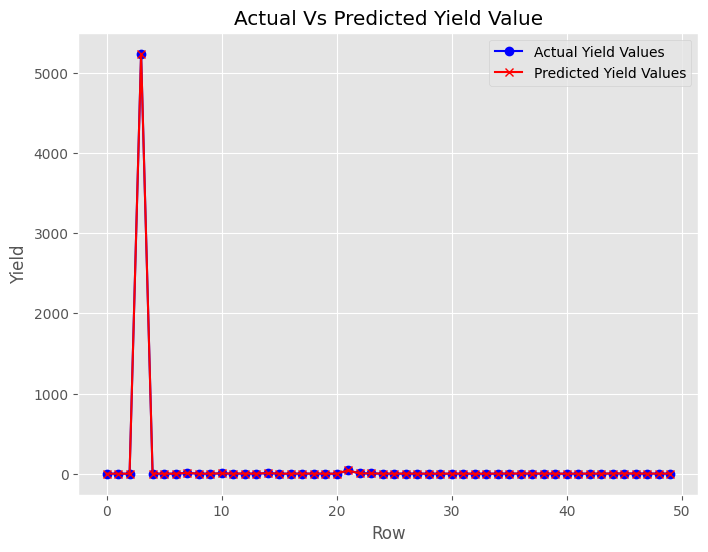

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(x, yieldsfr, label="Actual Yield Values", color="blue", marker="o")
plt.plot(x, yieldpr, label="Predicted Yield Values", color="red", marker="x")
plt.xlabel("Row")
plt.ylabel("Yield")
plt.title("Actual Vs Predicted Yield Value")
plt.legend()
plt.grid(True)
plt.show()

IMPORTING PICKLE FILES

In [137]:
import pickle
pickle.dump(model, open("model.pkl","wb"))
pickle.dump(prepro, open("preprocesser.pkl","wb"))